In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read dataset

df = pd.read_csv(r"/content/loan_data_set.csv")

In [ ]:
'''
Loan_ID: A unique identifier for each loan application.
Gender: The gender of the applicant (e.g., Male, Female).
Married: Marital status of the applicant (e.g., Yes, No).
Dependents: Number of people who depend financially on the applicant (e.g., 0, 1, 2, 3+).
Education: The education level of the applicant (e.g., Graduate, Not Graduate).
Self_Employed: Whether the applicant is self-employed (e.g., Yes, No).
ApplicantIncome: The monthly income of the applicant.
CoapplicantIncome: The monthly income of the co-applicant.
LoanAmount: The amount of money requested for the loan.
Loan_Amount_Term: The term of the loan in months.
Credit_History: The credit history of the applicant (1 means good credit history, 0 means bad credit history).
Property_Area: The area in which the property is located (e.g., Urban, Semiurban, Rural).
Loan_Status: The status of the loan application (e.g., Y for approved, N for not approved).
'''

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# It checks the null values present or not in data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df['Gender'].isnull().sum()

0

In [ ]:
df["Married"].mode()

0    Yes
Name: Married, dtype: object

In [ ]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [ ]:
df['Married'].isnull().sum()

0

In [ ]:
# Convert 'Dependents' column to numeric data type
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

# Calculate the mean value of the numeric 'Dependents' column
mean_value = df['Dependents'].mean()

# Fill missing values in the 'Dependents' column with the rounded mean value
df['Dependents'] = round(df['Dependents'].fillna(mean_value), 2)


In [ ]:
df['Dependents'].isnull().sum()

0

In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['Self_Employed'].isnull().sum()

0

In [ ]:
df['LoanAmount']=round(df['LoanAmount'].fillna(df['LoanAmount'].mean()),2)

In [ ]:
df['Loan_Amount_Term']=round(df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()),2)

In [ ]:
df['Credit_History']=round(df['Credit_History'].fillna(df['Credit_History'].mean()),2)

In [ ]:
# It shows the information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
# It shows the datatypes

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# It shows the first five records

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y


In [ ]:
df.drop(columns=['Loan_ID'], inplace=True)

In [ ]:
# it shows the last five records

df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.00,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,0.55,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.00,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.00,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.00,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


<Axes: ylabel='ApplicantIncome'>

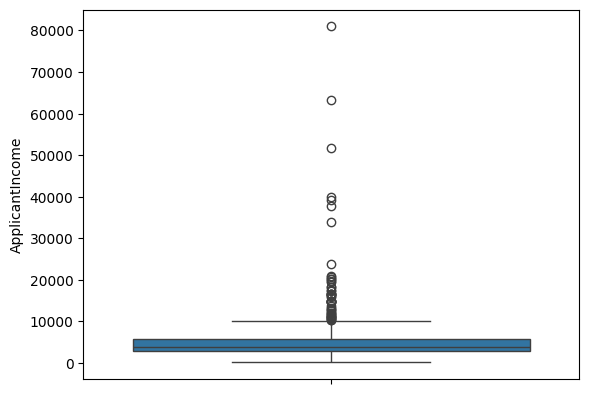

In [ ]:
sns.boxplot(df['ApplicantIncome'])

**Removing Outliers**

In [ ]:
Q1=np.percentile(df['ApplicantIncome'],25)

In [ ]:
Q3=np.percentile(df['ApplicantIncome'],75)

In [ ]:
IQR=Q3-Q1

In [ ]:
Min1=Q1-1.5*IQR
Max1=Q3+1.5*IQR

In [ ]:
df=df[(df['ApplicantIncome']>Min1) & (df['ApplicantIncome']<Max1)]

<Axes: ylabel='ApplicantIncome'>

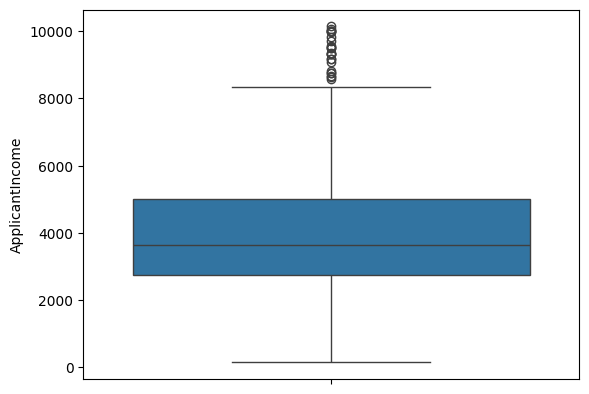

In [ ]:
sns.boxplot(df["ApplicantIncome"])

<Axes: ylabel='CoapplicantIncome'>

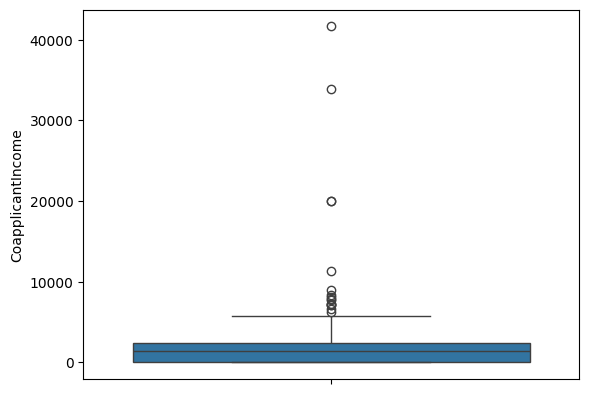

In [ ]:
sns.boxplot(df["CoapplicantIncome"])

In [ ]:
Q1=np.percentile(df['CoapplicantIncome'],25)

In [ ]:
Q3=np.percentile(df['CoapplicantIncome'],75)

In [ ]:
IQR=Q3-Q1

In [ ]:
Min1=Q1-1.5*IQR
Max1=Q3+1.5*IQR

In [ ]:
df=df[(df['CoapplicantIncome']>Min1) & (df['CoapplicantIncome']<Max1)]

<Axes: ylabel='CoapplicantIncome'>

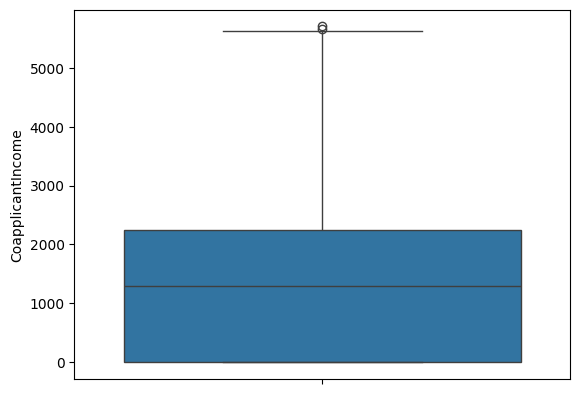

In [ ]:
sns.boxplot(df["CoapplicantIncome"])

<Axes: ylabel='LoanAmount'>

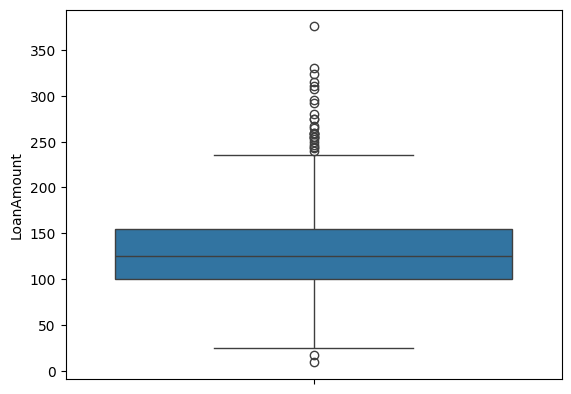

In [ ]:
sns.boxplot(df["LoanAmount"])

In [ ]:
Q1=np.percentile(df['LoanAmount'],25)

In [ ]:
Q3=np.percentile(df['LoanAmount'],75)

In [ ]:
IQR=Q3-Q1

In [ ]:
Min1=Q1-1.5*IQR
Max1=Q3+1.5*IQR

In [ ]:
df=df[(df['LoanAmount']>Min1) & (df['LoanAmount']<Max1)]

<Axes: ylabel='LoanAmount'>

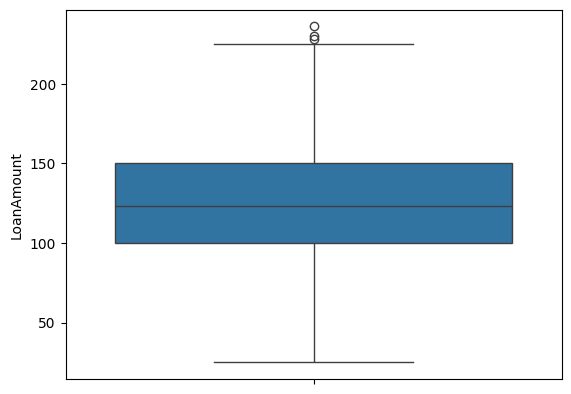

In [ ]:
sns.boxplot(df["LoanAmount"])

<Axes: ylabel='Credit_History'>

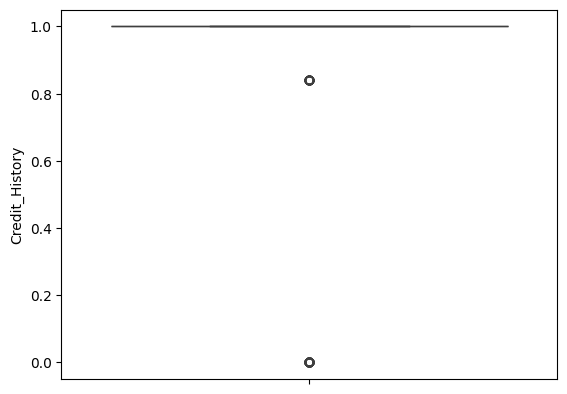

In [ ]:
sns.boxplot(df["Credit_History"])

<Axes: xlabel='NObeyesdad'>

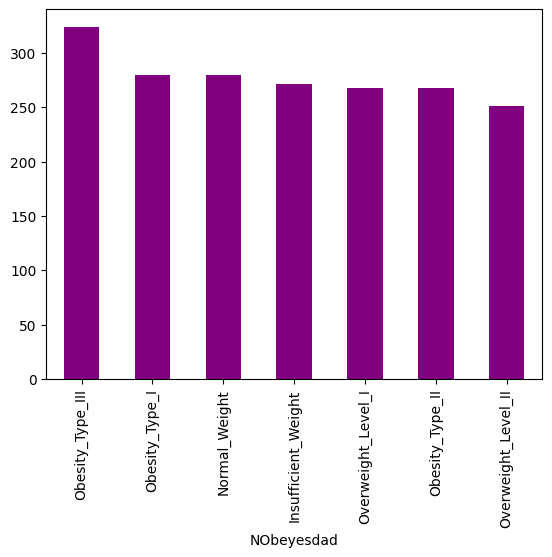

In [ ]:
# It represent the counts of different values in the 'NObeyesdad' column.

df['NObeyesdad'].value_counts().plot(kind='bar',color="purple")

<Axes: xlabel='Gender'>

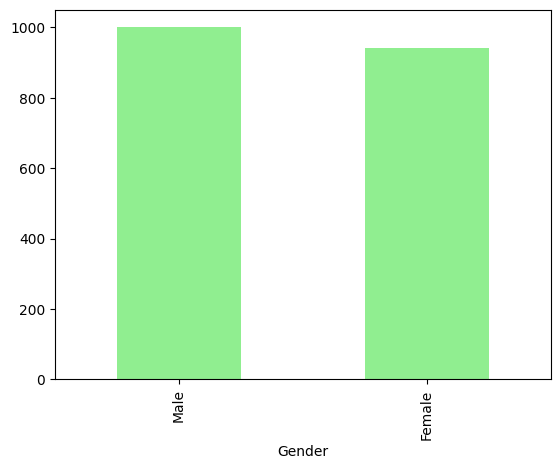

In [ ]:
# It shows the count of each gender category.

df['Gender'].value_counts().plot(kind='bar',color="lightgreen")

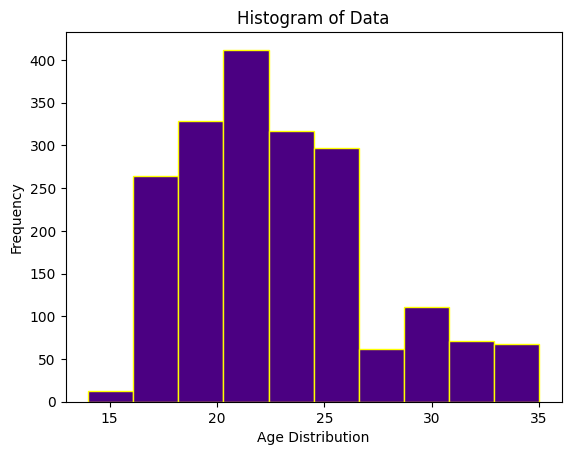

In [ ]:
data = df["Age"]

plt.hist(data, bins=10, color='Indigo', edgecolor='yellow')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


<Axes: xlabel='FAVC'>

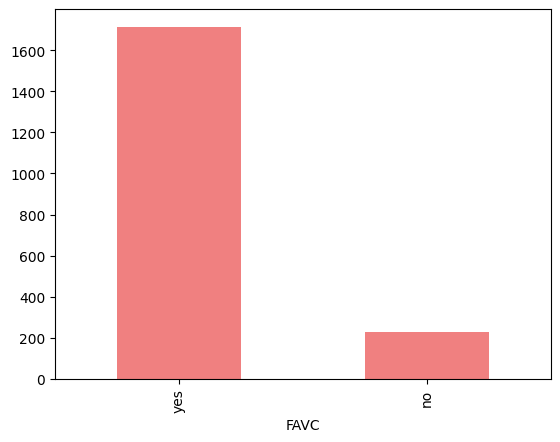

In [ ]:
df['FAVC'].value_counts().plot(kind='bar',color="lightcoral")

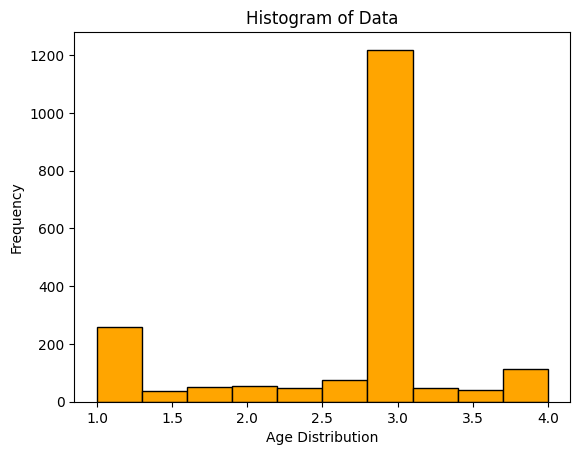

In [ ]:
# It shows how ages are distributed within the dataset.

data = df["NCP"]

plt.hist(data, bins=10, color='orange', edgecolor='black')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


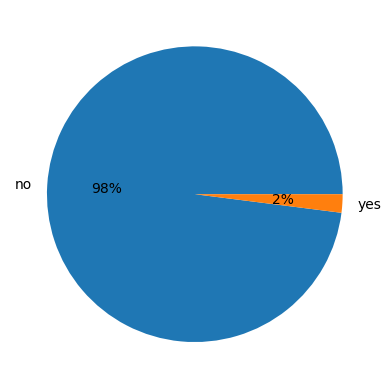

In [ ]:
# It shows the percentage of individuals who smoke and those who do not smoke.
# The autopct parameter formats the percentages.

plt.pie(df['SMOKE'].value_counts(), labels=df['SMOKE'].value_counts().index[0:], autopct='%.0f%%')
plt.show()

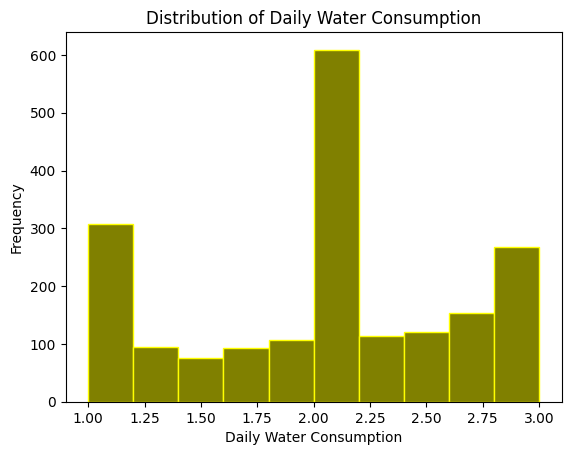

In [ ]:
# It represnting how daily water consumption is distributed.

data = df["CH2O"]

plt.hist(data, bins=10, color='olive', edgecolor='yellow')
plt.xlabel('Daily Water Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Water Consumption')
plt.show()


<Axes: xlabel='SCC'>

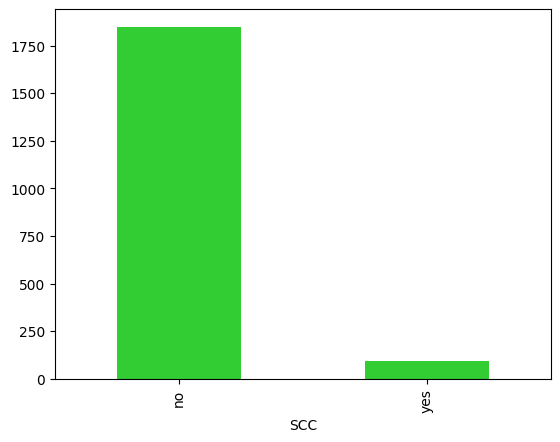

In [ ]:
# It represent the count of individuals who monitor their calorie consumption.

df['SCC'].value_counts().plot(kind='bar',color="limegreen")

Text(0, 0.5, 'Count')

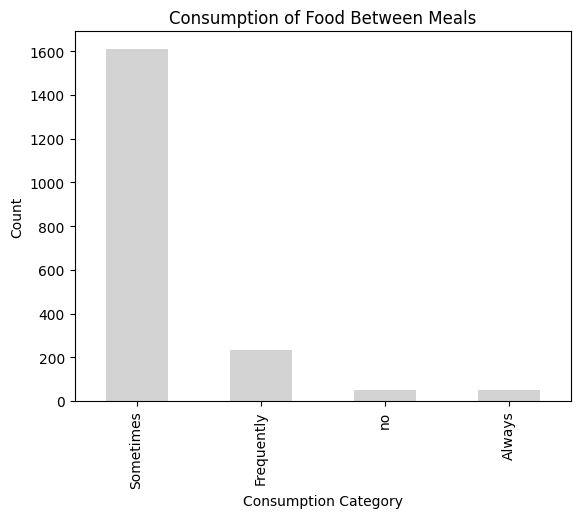

In [ ]:
# It represent the count of individuals who monitor their calorie consumption.

df['CAEC'].value_counts().plot(kind='bar',color="lightgray")
plt.title('Consumption of Food Between Meals')
plt.xlabel('Consumption Category')
plt.ylabel('Count')

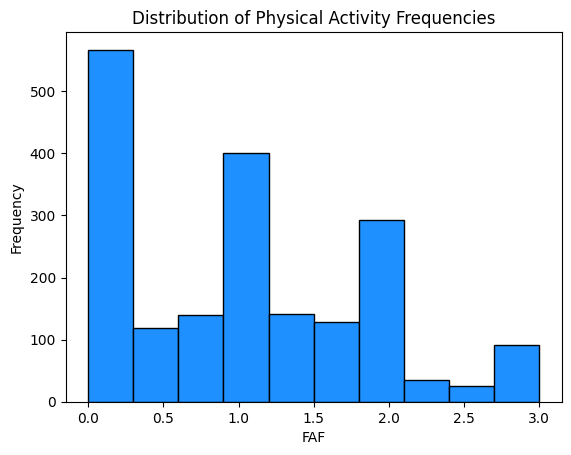

In [ ]:
# It represnting how physical activity frequencies are distributed.

data = df["FAF"]

plt.hist(data, bins=10, color='dodgerblue', edgecolor='black')
plt.xlabel('FAF')
plt.ylabel('Frequency')
plt.title('Distribution of Physical Activity Frequencies')
plt.show()


Text(0, 0.5, 'Count')

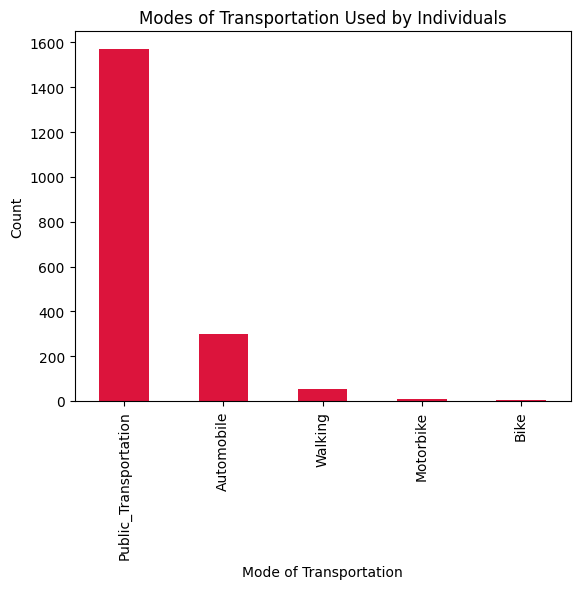

In [ ]:
# It displays distribution of transportation modes used by individuals.

df['MTRANS'].value_counts().plot(kind='bar',color="Crimson")
plt.title('Modes of Transportation Used by Individuals')
plt.xlabel('Mode of Transportation')
plt.ylabel('Count')

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.00,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1.00,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0.00,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0.00,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0.00,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0.00,Graduate,No,3232,1950.0,108.00,360.0,1.0,Rural,Y
609,Female,No,0.00,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,Y
610,Male,Yes,0.55,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,Y
612,Male,Yes,2.00,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,Y


In [ ]:
# dummies for conversion of categorical data into numerical form.

df = pd.get_dummies(data=df,columns=['Gender',"Married","Education","Self_Employed","Property_Area"],drop_first=True)

In [ ]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.00,5849,0.0,146.41,360.0,1.0,Y,True,False,False,False,False,True
1,1.00,4583,1508.0,128.00,360.0,1.0,N,True,True,False,False,False,False
2,0.00,3000,0.0,66.00,360.0,1.0,Y,True,True,False,True,False,True
3,0.00,2583,2358.0,120.00,360.0,1.0,Y,True,True,True,False,False,True
4,0.00,6000,0.0,141.00,360.0,1.0,Y,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.00,3232,1950.0,108.00,360.0,1.0,Y,True,True,False,False,False,False
609,0.00,2900,0.0,71.00,360.0,1.0,Y,False,False,False,False,False,False
610,0.55,4106,0.0,40.00,180.0,1.0,Y,True,True,False,False,False,False
612,2.00,7583,0.0,187.00,360.0,1.0,Y,True,True,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               520 non-null    float64
 1   ApplicantIncome          520 non-null    int64  
 2   CoapplicantIncome        520 non-null    float64
 3   LoanAmount               520 non-null    float64
 4   Loan_Amount_Term         520 non-null    float64
 5   Credit_History           520 non-null    float64
 6   Loan_Status              520 non-null    object 
 7   Gender_Male              520 non-null    bool   
 8   Married_Yes              520 non-null    bool   
 9   Education_Not Graduate   520 non-null    bool   
 10  Self_Employed_Yes        520 non-null    bool   
 11  Property_Area_Semiurban  520 non-null    bool   
 12  Property_Area_Urban      520 non-null    bool   
dtypes: bool(6), float64(5), int64(1), object(1)
memory usage: 35.5+ KB


In [ ]:
df['Gender_Male']=df['Gender_Male'].astype('int')

In [ ]:
df['Married_Yes']=df['Married_Yes'].astype('int')

In [ ]:
df['Education_Not Graduate']=df['Education_Not Graduate'].astype('int')

In [ ]:
df['Self_Employed_Yes']=df['Self_Employed_Yes'].astype('int')

In [ ]:
df['Property_Area_Semiurban']=df['Property_Area_Semiurban'].astype('int')

In [ ]:
df['Property_Area_Urban']=df['Property_Area_Urban'].astype('int')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

#Normal_Weight: 0
#Overweight_Level_I: 1
#Overweight_Level_II: 2
#Obesity_Type_I: 3


In [ ]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
0,0.00,5849,0.0,146.41,360.0,1.0,1,1,0,0,0,0,1,0
1,1.00,4583,1508.0,128.00,360.0,1.0,0,1,1,0,0,0,0,1
2,0.00,3000,0.0,66.00,360.0,1.0,1,1,1,0,1,0,1,1
3,0.00,2583,2358.0,120.00,360.0,1.0,1,1,1,1,0,0,1,1
4,0.00,6000,0.0,141.00,360.0,1.0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.00,3232,1950.0,108.00,360.0,1.0,1,1,1,0,0,0,0,1
609,0.00,2900,0.0,71.00,360.0,1.0,1,0,0,0,0,0,0,0
610,0.55,4106,0.0,40.00,180.0,1.0,1,1,1,0,0,0,0,1
612,2.00,7583,0.0,187.00,360.0,1.0,1,1,1,0,0,0,1,1


In [ ]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Married_Yes '],
      dtype='object')

In [ ]:
x = df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Married_Yes']]

In [ ]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
0,0.00,5849,0.0,146.41,360.0,1.0,1,0,0,0,0,1,0
1,1.00,4583,1508.0,128.00,360.0,1.0,1,1,0,0,0,0,1
2,0.00,3000,0.0,66.00,360.0,1.0,1,1,0,1,0,1,1
3,0.00,2583,2358.0,120.00,360.0,1.0,1,1,1,0,0,1,1
4,0.00,6000,0.0,141.00,360.0,1.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.00,3232,1950.0,108.00,360.0,1.0,1,1,0,0,0,0,1
609,0.00,2900,0.0,71.00,360.0,1.0,0,0,0,0,0,0,0
610,0.55,4106,0.0,40.00,180.0,1.0,1,1,0,0,0,0,1
612,2.00,7583,0.0,187.00,360.0,1.0,1,1,0,0,0,1,1


In [ ]:
y = df['Loan_Status']

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 520, dtype: int64

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state= 100)


In [ ]:
x_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
26,0.00,2799,2253.0,122.0,360.0,1.00,1,1,0,0,1,0,1
601,0.00,2894,2792.0,155.0,360.0,1.00,1,1,1,0,0,0,1
449,1.00,2769,1542.0,190.0,360.0,0.84,1,0,1,1,1,0,0
553,0.00,2454,2333.0,181.0,360.0,0.00,1,1,1,0,0,1,1
273,0.00,2620,2223.0,150.0,360.0,1.00,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.00,3237,0.0,30.0,360.0,1.00,0,0,0,0,0,1,0
328,0.00,4333,2451.0,110.0,360.0,1.00,0,1,0,0,0,1,1
61,0.55,3029,0.0,99.0,360.0,1.00,1,1,0,0,0,1,1
408,1.00,8300,0.0,152.0,300.0,0.00,1,1,0,0,1,0,1


In [ ]:
y_test

356    1
388    1
89     1
445    1
608    1
      ..
40     0
537    1
153    0
429    1
242    1
Name: Loan_Status, Length: 156, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

scalar.fit(x_train)

x_train=scalar.transform(x_train)

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
model=SVC() # model Initialization

In [ ]:
model.fit(x_train, y_train)  # model train

SVC()

In [ ]:
y_pred= model.predict(x_test)  # model prediction is done on x_test

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_true are the true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
accuracy

0.7243589743589743

In [ ]:
confusion_matrix(y_test, y_pred)

array([[  0,  43],
       [  0, 113]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       113

    accuracy                           0.72       156
   macro avg       0.36      0.50      0.42       156
weighted avg       0.52      0.72      0.61       156



**Decision Tree**

In [ ]:
from sklearn import tree
model1= tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
model1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
prediction2= model1.predict(x_test)  # model prediction is done on x_test

In [ ]:
accuracy1 = accuracy_score(y_test, prediction2)

In [ ]:
accuracy1

0.5705128205128205

In [ ]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.27      0.33      0.29        43
           1       0.72      0.66      0.69       113

    accuracy                           0.57       156
   macro avg       0.50      0.49      0.49       156
weighted avg       0.60      0.57      0.58       156



In [ ]:
metrics.confusion_matrix(y_test,prediction2)

array([[14, 29],
       [38, 75]])

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg

LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_prediction=logreg.predict(x_test)

In [ ]:
accuracy2 = accuracy_score(y_test, y_prediction)

In [ ]:
accuracy2

0.7115384615384616

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.45      0.21      0.29        43
           1       0.75      0.90      0.82       113

    accuracy                           0.71       156
   macro avg       0.60      0.56      0.55       156
weighted avg       0.67      0.71      0.67       156



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier(n_estimators=500)

In [ ]:
rfc

RandomForestClassifier(n_estimators=500)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
prediction3= rfc.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1])

In [ ]:
 accuracy_score(y_test, prediction3)

0.7051282051282052

In [ ]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.45      0.33      0.38        43
           1       0.77      0.85      0.81       113

    accuracy                           0.71       156
   macro avg       0.61      0.59      0.59       156
weighted avg       0.68      0.71      0.69       156



In [ ]:
metrics.confusion_matrix(y_test,prediction3)

array([[14, 29],
       [17, 96]])

**XG Boost**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model= XGBClassifier(gamma=0)

In [ ]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb_model.predict(x_test)

In [ ]:
xgb_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
accuracy_score(y_test, xgb_pred)

0.8141025641025641

In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        43
           1       0.86      0.89      0.87       113

    accuracy                           0.81       156
   macro avg       0.77      0.75      0.76       156
weighted avg       0.81      0.81      0.81       156



In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test,xgb_pred)

array([[ 26,  17],
       [ 12, 101]])

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_estimator= DecisionTreeClassifier(max_depth=1)  # you can adjust paramter of the base estimator

adaboost_model= AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [ ]:
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
predi = adaboost_model.predict(x_test)

In [ ]:
accuracy_score(y_test, predi)

0.5961538461538461

**Accuracy Score:**

LogisticRegression = 0.71

Support Vector Classifier = 0.72

Decision Tree = 0.57

Random Forest = 0.70

XG Boost = 0.81

AdaBoost = 0.59

###The Highest Accuracy Contain XG Boost Algorithm